# Marketing Analytics For E-Commerce Market Place Company

Business Context:
The client is one of the leading online market place in India and would like partner with Analytixlabs.
Client wants help in measuring, managing and analysing performance of business.
Analytixlabs has hired you as an analyst for this project where client asked you to provide data
driven insights about business and understand customer, seller behaviors, product behavior and
channel behavior etc...
While working on this project, you are expected to clean the data (if required) before analyze it.
Available Data:
Data has been provided for the period of Sep 2016 to Oct 2018 and the below is the data model.
Tables:
Customers: Customers information
Sellers: Sellers information
Products: Product information
Orders: Orders info like ordered, product id, status, order dates etc..
Order_Items: Order level information
Order_Payments: Order payment information
Order_Review_Ratings: Customer ratings at order level
Geo-Location: Location details

Business Objective:

The below are few Sample business questions to be addressed as part of this analysis. However this
is not exhaustive list and you can add as many as analysis and provide insights on the same.

1. Perform Detailed exploratory analysis
    
    a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
    products, Total categories, Total sellers, Total locations, Total channels, Total
    payment methods etc…)
    
    b. Understanding how many new customers acquired every month
    
    c. Understand the retention of customers on month on month basis
    
    d. How the revenues from existing/new customers on month on month basis
    
    e. Understand the trends/seasonality of sales, quantity by category, location, month,
    week, day, time, channel, payment method etc…
    
    f. Popular Products by month, seller, state, category.
    
    g. Popular categories by state, month
    
    h. List top 10 most expensive products sorted by price

2. Performing Customers/sellers Segmentation
    
    a. Divide the customers into groups based on the revenue generated
    
    b. Divide the sellers into groups based on the revenue generated

3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

4. Payment Behaviour

    a. How customers are paying?

    b. Which payment channels are used by most customers?

5. Customer satisfaction towards category & product
    
    a. Which categories (top 10) are maximum rated & minimum rated?

    b. Which products (top10) are maximum rated & minimum rated?
    
    c. Average rating by location, seller, product, category, month etc.



    Data Model:(shown Below)

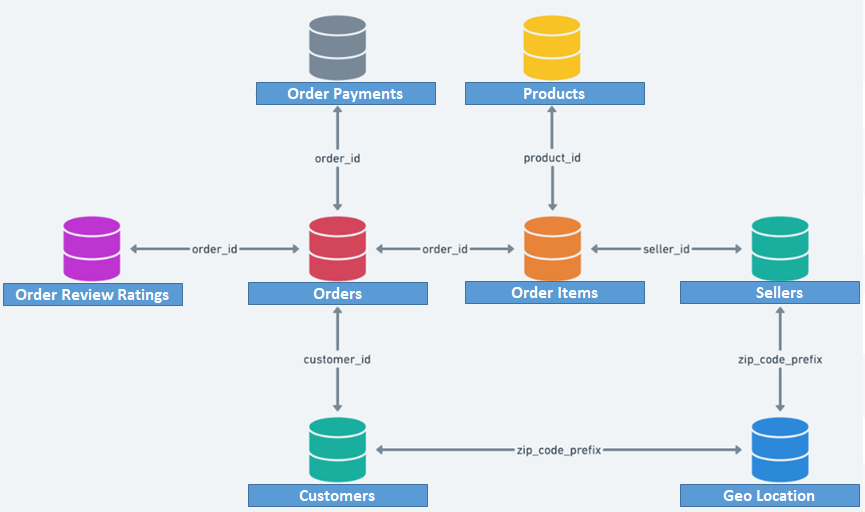

In [74]:
from IPython.display import Image
Image(filename='Data_model.jpg')

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

First merge all the datasetes and create a combined data set

In [76]:
orders,payments,order_item,order_rating,customer,product,seller,geolocation = pd.read_csv("ORDERS.csv"),pd.read_csv("ORDER_PAYMENTS.csv"),pd.read_csv("ORDER_ITEMS.csv"),pd.read_csv("ORDER_REVIEW_RATINGS.csv"),pd.read_csv("CUSTOMERS.csv"),pd.read_csv("PRODUCTS.csv"),pd.read_csv("SELLERS.csv"),pd.read_csv("GEO_LOCATION.csv")
customer.rename(columns={"customer_zip_code_prefix":"zip_code_prefix","customer_city":"city","customer_state":"state"},inplace = True)
geolocation.rename(columns={"geolocation_zip_code_prefix":"zip_code_prefix","geolocation_city":"city","geolocation_state":"state"},inplace = True)
combined = orders.merge(order_rating.merge(payments.merge(order_item,on=["order_id"]),on=["order_id"]),on=["order_id"])
combined = combined.merge(customer,on=["customer_id"]).merge(geolocation,on=["zip_code_prefix","city","state"])
combined
# geolocation

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,zip_code_prefix,city,state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,-23.574809,-46.587471
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,-23.574809,-46.587471
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,-23.574809,-46.587471
3,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,3/22/2018 17:23,3/22/2018 18:05,3/23/2018 18:03,3/25/2018 17:22,4/4/2018 0:00,3cd186b6013f4145b9bd406847b61f19,5,...,da8622b14eb17ae2831f4ac5b9dab84a,3/28/2018 18:05,99.90,11.79,8a4002923e801e3120a11070fd31c9e2,3149,Akkarampalle,Andhra Pradesh,-23.574809,-46.587471
4,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,3/22/2018 17:23,3/22/2018 18:05,3/23/2018 18:03,3/25/2018 17:22,4/4/2018 0:00,3cd186b6013f4145b9bd406847b61f19,5,...,da8622b14eb17ae2831f4ac5b9dab84a,3/28/2018 18:05,99.90,11.79,8a4002923e801e3120a11070fd31c9e2,3149,Akkarampalle,Andhra Pradesh,-23.574809,-46.587471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112153,87334ea6311529ce3e36b18350d2d4b3,02f29ee4753e69018942c30e71c04cfd,delivered,1/20/2018 18:39,1/20/2018 19:09,1/23/2018 19:29,1/31/2018 18:38,2/20/2018 0:00,495b3621654bfa0af2a08d9347606c4b,5,...,955fee9216a65b617aa5c0531780ce60,1/25/2018 19:09,29.50,19.84,f86370dc13be4e8958cb036b628afbcc,25932,Anklav,Gujarat,-22.597556,-43.176153
112154,5bd233924f0b9c52492bd5a92e5ab2d3,d7475a536385854da614094f0bf12275,delivered,5/30/2018 13:23,5/31/2018 3:15,6/4/2018 6:16,6/14/2018 22:49,7/13/2018 0:00,e0a51eca79c9540e758101658214f2b9,5,...,2d518637f53161b973e01f56ea4bb88e,6/11/2018 3:15,99.99,38.75,17e3c70fc02567ec2d3831fa78e037c0,77829,Kolar,Karnataka,-7.222311,-48.242792
112155,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,12/20/2017 9:52,12/20/2017 10:09,12/20/2017 20:25,1/26/2018 15:45,1/18/2018 0:00,8ea780895f362ce949029f95b7181ff0,1,...,ce248b21cb2adc36282ede306b7660e5,12/27/2017 10:09,55.90,15.14,a49e8e11e850592fe685ae3c64b40eca,83870,Aminagar Urf Bhurbaral,Uttar Pradesh,-26.001234,-49.668993
112156,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2/23/2017 9:05,2/23/2017 9:15,3/1/2017 10:22,3/6/2017 11:08,3/22/2017 0:00,96e8f371a3983122b739944537e15525,5,...,391fc6631aebcf3004804e51b40bcf1e,2/27/2017 9:05,139.90,16.09,831ce3f1bacbd424fc4e38fbd4d66d29,5127,Akkarampalle,Andhra Pradesh,-23.495994,-46.742453


In [77]:
combined.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_unique_id                object
zip_code_prefix                    int64
city            

In [78]:
combined.order_status.unique()
sys.getsizeof(combined)

163820383

We are changing the following values:

delivered    = 0

invoiced     = 1

shipped      = 2

processing   = 3

canceled     = 4

approved     = 5

unavailable  = 6


and we will change the dtype of order_status  to uint8 to save the memory

In [79]:
combined["order_status"] =combined["order_status"].replace(combined.order_status.unique(),[0,1,2,3,4,5,6]).astype("uint8")


In [80]:
combined.review_score = combined.review_score.astype("uint8")
combined.order_item_id = combined.order_item_id.astype("uint8")
combined.payment_sequential = combined.payment_sequential.astype("uint8")
combined.payment_installments = combined.payment_installments.astype("uint8")
combined.zip_code_prefix = combined.zip_code_prefix.astype("uint32")
# combined.payment_value.max()

In [86]:
combined["order_purchase_timestamp"] = pd.to_datetime(combined["order_purchase_timestamp"])
combined["order_approved_at"] = pd.to_datetime(combined["order_approved_at"])
combined["order_delivered_carrier_date"] = pd.to_datetime(combined["order_delivered_carrier_date"])
combined["order_delivered_customer_date"] = pd.to_datetime(combined["order_delivered_customer_date"])
combined["order_estimated_delivery_date"] = pd.to_datetime(combined["order_estimated_delivery_date"])
combined["order_approved_at"] = pd.to_datetime(combined["order_approved_at"])
combined["review_creation_date"] = pd.to_datetime(combined["review_creation_date"])
combined["review_answer_timestamp"] = pd.to_datetime(combined["review_answer_timestamp"])
combined["shipping_limit_date"] = pd.to_datetime(combined["shipping_limit_date"])
# combined["order_purchase_timestamp"].apply(pd.to_datetime())

In [82]:
combined.dtypes

order_id                          object
customer_id                       object
order_status                       uint8
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       uint8
review_creation_date              object
review_answer_timestamp           object
payment_sequential                 uint8
payment_type                      object
payment_installments               uint8
payment_value                    float64
order_item_id                      uint8
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
customer_unique_id                object
zip_code_prefix                   uint32
city            

In [83]:
combined.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1200
order_delivered_customer_date    2465
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
zip_code_prefix                     0
city                                0
state                               0
geolocation_

In [87]:
# import sys
sys.getsizeof(combined)

96121454

Here we have reduced the data from 156 MB to 91 MB which will increase our performance

In [88]:
pd.to_datetime(combined["order_purchase_timestamp"],format="%m/%d/%Y")